In [1]:
pip install fortran-magic

In [2]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [3]:
% reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
lista_1 = [2, 'cuatro', 6.0, 8, 'diez']
lista_1

[2, 'cuatro', 6.0, 8, 'diez']

In [8]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [9]:
pos_2 = lista_1[1]
pos_4 = lista_1[3]
print ('Segundo Elemento: ', pos_2)
print ('Cuarto Elemento: ', pos_4)

Segundo Elemento:  cuatro
Cuarto Elemento:  8


In [10]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [11]:
ultimo_elm = lista_1[-1]
penultimo_elm = lista_1[-2]
print ('Ultimo Elemento: ', ultimo_elm)
print ('Penultimo Elemento: ', penultimo_elm)

Ultimo Elemento:  diez
Penultimo Elemento:  8


In [12]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [13]:
sub_l1 = lista_1[2:4]
sub_l1

[6.0, 8]

In [14]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [15]:
primero_penult = lista_1[:len(lista_1)-1]
primero_penult

[2, 'cuatro', 6.0, 8]

In [16]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [17]:
despues_tercero = lista_1[3:]
despues_tercero

[8, 'diez']

In [18]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [19]:
l_2 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
l_2[2:8:2]

['C', 'E', 'G']

In [20]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [21]:
l_2[::-1]

['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

In [22]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [23]:
l_3 = [10, 20, 30, 40, 50]
print('Antes: ', l_3)
l_3.append('Sesenta')
print('Despues: ', l_3)

Antes:  [10, 20, 30, 40, 50]
Despues:  [10, 20, 30, 40, 50, 'Sesenta']


In [24]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [25]:
l_3 = [10, 20, 30, 40, 50]
[y / 10 for y in l_3]

[1.0, 2.0, 3.0, 4.0, 5.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [26]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [27]:
colores = {'Primarios': ['Amarillo', 'Azul', 'Rojo'], 'Secundarios': ['Verde', 'Naranja']}
colores

{'Primarios': ['Amarillo', 'Azul', 'Rojo'],
 'Secundarios': ['Verde', 'Naranja']}

In [28]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [29]:
colores['Secundarios'] = 'Verde', 'Naranja', 'Violeta'
colores

{'Primarios': ['Amarillo', 'Azul', 'Rojo'],
 'Secundarios': ('Verde', 'Naranja', 'Violeta')}

In [30]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [31]:
del colores['Primarios']
colores

{'Secundarios': ('Verde', 'Naranja', 'Violeta')}

In [32]:
# No slicing.
#philosophers['Bertrand':'Immanuel']
#No se ejecuta porque no permite Slides

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [33]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [34]:
m1 = [[11, 3],
      [7, 11] ]

m2 = [[8, 0, 1],
      [0, 3, 5]]

In [35]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [36]:
def mult_matx(M1, M2):
  """Multiplicacion de Matrices A por B"""
  filas_salida = len(M1)
  colum_salida = len(M2[0])
  salida = [[0 for colm in range(colum_salida)] for filas in range(filas_salida)]

  for i in range(filas_salida):
    for j in range(colum_salida):
      for k in range(len(M2)):
        salida[i][j] += M1[i][k] * M2[k][j]
  return salida


<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [37]:
%%time

matmul(a, b)

CPU times: user 40 µs, sys: 8 µs, total: 48 µs
Wall time: 53.4 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [38]:
%%time

mult_matx(m1, m2)

CPU times: user 24 µs, sys: 5 µs, total: 29 µs
Wall time: 33.9 µs


[[88, 9, 26], [56, 33, 62]]

In [39]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.24849934544006969, 0.28085034302219625, 0.37316937152640994],
 [0.4957977476229002, 0.014511792115308175, 0.04842861430930778]]

In [40]:
def matx_al(m1, n1):
  salida_2 = []
  for fila in range(m1):
    salida_2.append([random.random() for _ in range(n1)])
  return salida_2

al_m = matx_al(3, 4)
al_m

[[0.4318303268471223,
  0.9670762778064196,
  0.023264791013217212,
  0.1444865307929274],
 [0.6337027519457795,
  0.6414177675674917,
  0.5954954169602424,
  0.12590703600113873],
 [0.6722804188979946,
  0.9420705728847335,
  0.6361753449458695,
  0.7375109417108462]]

In [41]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.5 s, sys: 47.2 ms, total: 11.5 s
Wall time: 11.6 s


In [42]:
%%time
al_A = matx_al(600, 100)
al_B = matx_al(100, 600)
res = mult_matx(al_A, al_B)

CPU times: user 11.6 s, sys: 45.2 ms, total: 11.6 s
Wall time: 11.7 s


In [43]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [44]:
def py_dot_p(fs, cs):
    return sum(f * c for f, c in zip(fs, cs))

In [45]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [46]:
%%fortran
subroutine fortran_dot_product(fs, cs, res_2)
    double precision, intent(in) :: fs(:)
    double precision, intent(in) :: cs(:)
    double precision, intent(out) :: res_2
    
    res_2 = sum(fs * cs)
end

In [47]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [48]:
ld = [float(i_2) for i_2 in range(100000)]
arr_d = np.array(ld)

In [49]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 12.8 ms


333328333350000.0

In [50]:
%%time
py_dot_p(ld, ld)

CPU times: user 10.6 ms, sys: 1.01 ms, total: 11.6 ms
Wall time: 12.5 ms


333328333350000.0

In [51]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 194 µs, sys: 4 µs, total: 198 µs
Wall time: 207 µs


333328333350000.0

In [52]:
%%time
fortran_dot_product(arr_d, arr_d)

CPU times: user 218 µs, sys: 0 ns, total: 218 µs
Wall time: 227 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [53]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [54]:
def mul_2(fs, cs):
  return[f * c for f, c in zip(fs, cs)]

mul_2([10, 20, 30, 5], [10, 20 + 0j, 30.0, 'Oh!!'])

[100, (400+0j), 900.0, 'Oh!!Oh!!Oh!!Oh!!Oh!!']

In [55]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [56]:
cod_fuente = 'j + o * e'
byte_cod = compile(cod_fuente, '', 'eval')
import dis; dis.dis(byte_cod)

  1           0 LOAD_NAME                0 (j)
              2 LOAD_NAME                1 (o)
              4 LOAD_NAME                2 (e)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [57]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [58]:
dt = np.array([10, 20, 30, 40])
dt

array([10, 20, 30, 40])

In [59]:
data + data

array([2, 4, 6, 8])

In [60]:
dt + dt

array([20, 40, 60, 80])

In [61]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 948 µs, total: 948 µs
Wall time: 1.08 ms


333328333350000.0

In [62]:
%%time
(arr_d * arr_d).sum()

CPU times: user 489 µs, sys: 0 ns, total: 489 µs
Wall time: 500 µs


333328333350000.0

In [63]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.19 ms, sys: 3.03 ms, total: 4.22 ms
Wall time: 4.59 ms


333328333350000.0

In [64]:
%%time
arr_d.dot(arr_d)

CPU times: user 0 ns, sys: 747 µs, total: 747 µs
Wall time: 764 µs


333328333350000.0

In [65]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 228 µs, sys: 0 ns, total: 228 µs
Wall time: 240 µs


333328333350000.0

In [66]:
%%time
fortran_dot_product(arr_d, arr_d)

CPU times: user 186 µs, sys: 5 µs, total: 191 µs
Wall time: 200 µs


333328333350000.0

In [67]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"
#invalid literal for int() with base 10: 'foo'

In [68]:
# We also can't grow an array once it's created.
#data.append(3)
#'numpy.ndarray' object has no attribute 'append'

In [69]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [70]:
dos_por_dos = dt.reshape(2,2)
dos_por_dos

array([[10, 20],
       [30, 40]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [71]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [72]:
arr_2 = np.array([10, 20, 30, 40, 50, 60], dtype='int16').reshape(3,2)
print("Array:\n", arr_2, sep='')
print("===========")
print("Tipo de Dato:", arr_2.dtype)
print("Forma:", arr_2.shape)
print("Pasos:", arr_2.strides)
print("Dato:", arr_2.data.tobytes())

Array:
[[10 20]
 [30 40]
 [50 60]]
Tipo de Dato: int16
Forma: (3, 2)
Pasos: (4, 2)
Dato: b'\n\x00\x14\x00\x1e\x00(\x002\x00<\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [73]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [74]:
dt_2 = np.arange(20).reshape(5, 4)
dt_2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [75]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [76]:
dt_2 * dt_2

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225],
       [256, 289, 324, 361]])

In [77]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [78]:
np.sqrt(dt_2)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335],
       [4.        , 4.12310563, 4.24264069, 4.35889894]])

In [79]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [80]:
(dt_2 % 7) == 0

array([[ True, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False]])

In [81]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [82]:
((dt_2 % 5) == 0) & ((dt_2 % 7) == 0)

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [83]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [84]:
dt_2 @ dt_2.T

array([[  14,   38,   62,   86,  110],
       [  38,  126,  214,  302,  390],
       [  62,  214,  366,  518,  670],
       [  86,  302,  518,  734,  950],
       [ 110,  390,  670,  950, 1230]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [85]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [86]:
seno = np.sin(np.linspace(0, 2*np.math.pi, 20))
coseno = seno = np.cos(np.linspace(0, 2*np.math.pi, 20))
seno


array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375, -0.9863613 ,
       -0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

In [87]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [88]:
seno[19]

1.0

In [89]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [90]:
coseno [:9]

array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375])

In [91]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [92]:
coseno[10:]

array([-0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

In [93]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [94]:
coseno[::4]

array([ 1.        ,  0.24548549, -0.87947375, -0.67728157,  0.54694816])

In [95]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [96]:
print ('Coseno: ', coseno)
print('Cos > 0: \n', coseno > 0)
print('Coseno[cos > 0]: \n', coseno[coseno > 0])

Coseno:  [ 1.          0.94581724  0.78914051  0.54694816  0.24548549 -0.08257935
 -0.40169542 -0.67728157 -0.87947375 -0.9863613  -0.9863613  -0.87947375
 -0.67728157 -0.40169542 -0.08257935  0.24548549  0.54694816  0.78914051
  0.94581724  1.        ]
Cos > 0: 
 [ True  True  True  True  True False False False False False False False
 False False False  True  True  True  True  True]
Coseno[cos > 0]: 
 [1.         0.94581724 0.78914051 0.54694816 0.24548549 0.24548549
 0.54694816 0.78914051 0.94581724 1.        ]


In [97]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [98]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [99]:
datos_sincl =np.array([2, 5, 6, 7, -5, 12, -13])

In [100]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [101]:
ord_ind = np.argsort(datos_sincl)
ord_ind

array([6, 4, 0, 1, 2, 3, 5])

In [102]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [103]:
datos_sincl[ord_ind]

array([-13,  -5,   2,   5,   6,   7,  12])

In [104]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [105]:
cap_mer = np.array([11, 9, 12, 6, 17])
assets_2 = np.array(['a', 'b', 'c', 'd', 'e'])

In [106]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [107]:
ord_cm = np.argsort(cap_mer)
assets_2[ord_cm]

array(['d', 'b', 'a', 'c', 'e'], dtype='<U1')

In [108]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [109]:
print("Datos:\n", repr(event_dates), '\n')
print("Valores:\n", repr(event_values), '\n')
print("Fecha:\n", repr(calendar), '\n')

Datos:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]') 

Valores:
 array([10, 15, 20]) 

Fecha:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]') 



In [110]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [111]:
print("Fila de Fechas:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Fechas en orden acendente:", calendar[calendar.searchsorted(event_dates)])

Fila de Fechas: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Fechas en orden acendente: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [112]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [113]:
dt_3 = np.arange(18).reshape(6, 3)
dt_3

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [114]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [115]:
dt_3[3:, 1:]

array([[10, 11],
       [13, 14],
       [16, 17]])

In [116]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [117]:
dt_3[[1, 5], -1]

array([ 5, 17])

In [118]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [119]:
dt_3[(dt_3[:, 0] % 5) == 0]

array([[ 0,  1,  2],
       [15, 16, 17]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [120]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [121]:
variance(np.random.standard_normal(1000))

1.017037374088976

In [122]:
variance(np.random.standard_exponential(2312))

1.0198304489253476

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [123]:
data = np.arange(30)
data.mean()

14.5

In [124]:
dt_4 = np.arange(48)
dt_4.mean()

23.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [125]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [126]:
dt_4 = np.arange(48).reshape(6, 8)
dt_4

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [127]:
data.mean()

14.5

In [128]:
dt_4.mean()

23.5

In [129]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [130]:
dt_4.mean(axis=-1)

array([ 3.5, 11.5, 19.5, 27.5, 35.5, 43.5])

In [131]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [132]:
dt_4.mean(axis=-2)

array([20., 21., 22., 23., 24., 25., 26., 27.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [133]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [134]:
fila = np.array([10, 20, 30, 40])
columna = np.array([[0.1], [0.2], [0.3], [0.4]])
print('Flia: \n', fila, sep='')
print('Columna: \n', columna, sep='')

Flia: 
[10 20 30 40]
Columna: 
[[0.1]
 [0.2]
 [0.3]
 [0.4]]


In [135]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [136]:
fila + columna

array([[10.1, 20.1, 30.1, 40.1],
       [10.2, 20.2, 30.2, 40.2],
       [10.3, 20.3, 30.3, 40.3],
       [10.4, 20.4, 30.4, 40.4]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [137]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [138]:
print("Dato:\n", dt_4, sep='')
print("Media:\n", dt_4.mean(axis=0), sep='')
print("Dato - Media:\n", dt_4 - dt_4.mean(axis=0), sep='')

Dato:
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]
Media:
[20. 21. 22. 23. 24. 25. 26. 27.]
Dato - Media:
[[-20. -20. -20. -20. -20. -20. -20. -20.]
 [-12. -12. -12. -12. -12. -12. -12. -12.]
 [ -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.]
 [  4.   4.   4.   4.   4.   4.   4.   4.]
 [ 12.  12.  12.  12.  12.  12.  12.  12.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [139]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [140]:
sr = pd.Series(index=['A', 'B', 'C', 'D', 'E'], data=[10, 20, 30, 40, 50])
sr

A    10
B    20
C    30
D    40
E    50
dtype: int64

In [141]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [142]:
print("Los Indices Son: ", sr.index)
print("Los Valores Son: ", sr.values)

Los Indices Son:  Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
Los Valores Son:  [10 20 30 40 50]


In [143]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [144]:
sr.iloc[3]

40

In [145]:
# ... or by label.
s.loc['a']

1

In [146]:
sr.loc['E']

50

In [147]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [148]:
s.iloc[:-1]

a    1
b    2
c    3
d    4
dtype: int64

In [149]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [150]:
sr.loc['B':]

B    20
C    30
D    40
E    50
dtype: int64

In [151]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [152]:
sr.iloc[1:-2]

B    20
C    30
dtype: int64

In [153]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [154]:
sr.loc[sr < 32]

A    10
B    20
C    30
dtype: int64

In [155]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [156]:
sr_2 = pd.Series({'J': 9.0, 'O': 7.0, 'E': 3.0})
sr_2

J    9.0
O    7.0
E    3.0
dtype: float64

In [157]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [158]:
sr +sr_2

A     NaN
B     NaN
C     NaN
D     NaN
E    53.0
J     NaN
O     NaN
dtype: float64

In [159]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [160]:
(sr + sr_2).fillna(1.0)

A     1.0
B     1.0
C     1.0
D     1.0
E    53.0
J     1.0
O     1.0
dtype: float64

In [161]:
# Most real datasets are read in from an external file format.
#aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
#Cambiamos la linea anterior por un metodo mas efectivo para no subir archivos.
import pandas_datareader as pdr
aapl = pdr.get_data_yahoo('AAPL', start= '2010-01-04', end='2017-08-17')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136


In [162]:
amzn = pdr.get_data_yahoo('AMZN', start= '2019-01-01', end='2021-01-01')
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956


In [163]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,High,Low
Date,,
2010-01-04,7.660714,7.585000
2010-01-05,7.699643,7.616071


In [164]:
amzn.iloc[:5, :-1]

,High,Low,Open,Close,Volume
Date,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400


In [165]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,6.954643,749876400.0
2010-02-02,6.995000,698342400.0
2010-02-03,7.115357,615328000.0
2010-02-04,6.858929,757652000.0


In [166]:
amzn.loc[pd.Timestamp('2020-12-24'):pd.Timestamp('2020-12-31'), ['Adj Close', 'Open']]

,Adj Close,Open
Date,,
2020-12-24,3172.689941,3193.899902
2020-12-28,3283.959961,3194.000000
2020-12-29,3322.000000,3309.939941
2020-12-30,3285.850098,3341.000000
2020-12-31,3256.929932,3275.000000


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

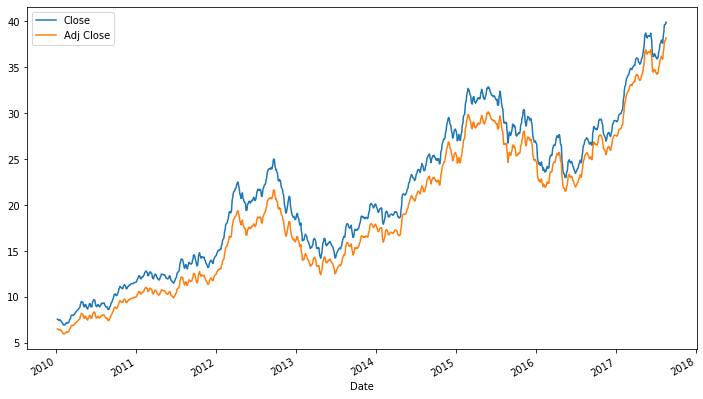

In [167]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

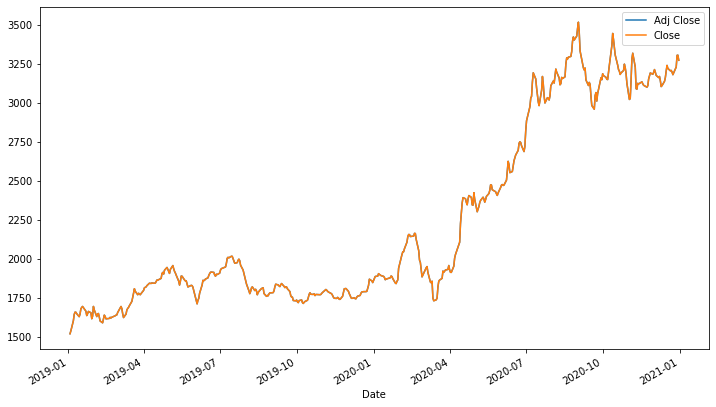

In [168]:
amzn.rolling(2)[['Adj Close', 'Close']].mean().plot();

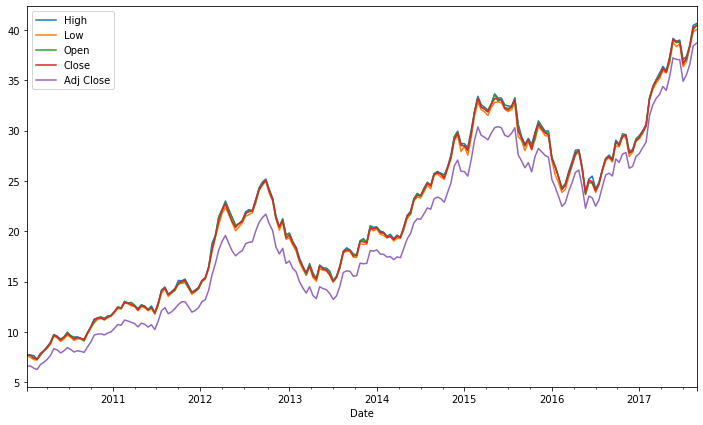

In [169]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

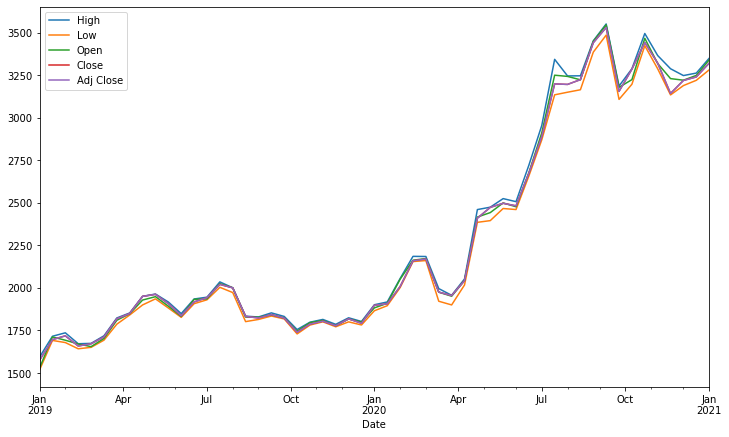

In [170]:
amzn.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

In [ ]:
amzn['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

In [ ]:
from demos.avocados import read_avocadata
avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
avocados.tail()

In [ ]:
#Leemos los datos desde la paguina de datos
#Datos 
url="https://www.datos.gov.co/resource/gt2j-8ykr.csv"
cov_19 = pd.read_csv(url)

In [ ]:
cov_19.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
#Eliminamos algunas columnas que no utilizaremos en este ejemplo
cov_19.drop(['id_de_caso', 'fecha_reporte_web', 'departamento', 'departamento_nom', 
             'fuente_tipo_contagio', 'ciudad_municipio', 'unidad_medida', 'ubicacion', 
             'pais_viajo_1_cod', 'tipo_recuperacion', 
             'nom_grupo_', 'fecha_de_notificaci_n', 'per_etn_'], axis=1, inplace=True)
cov_19.head()

In [ ]:
cov_19.rename(columns={'ciudad_municipio_nom':'ciudad', 
                       'pais_viajo_1_nom':'lugar_contagio', 'fecha_inicio_sintomas':'f_i_s'}, inplace=True)

In [ ]:
cov_19.columns

In [ ]:
cov_19[['fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado']] = cov_19[['fecha_muerte', 'fecha_diagnostico', 'fecha_recuperado']].astype('datetime64[ns]')

In [ ]:
cov_19.dtypes

In [ ]:
cov_19.head()

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
cov_19.groupby(['fecha_diagnostico', 'lugar_contagio'])['edad'].mean().unstack().ffill().plot();
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [ ]:
edades = cov_19['edad']
plt.title('Histograma de edades');
plt.hist(edades, bins=10, alpha=0.8, edgecolor = 'black',  linewidth=1);
plt.grid(True);
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.show();
plt.clf();


In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
gp_test = cov_19[['sexo', 'ciudad','fecha_diagnostico', 'fecha_recuperado']]
cov_gp = gp_test.groupby(['sexo', 'ciudad'], as_index=False).mean()
cov_gp

In [ ]:
cov_pivot = cov_gp.pivot(index='ciudad', columns='sexo')
cov_pivot

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!